<a href="https://colab.research.google.com/github/Daishinkan002/Gender_Identifier/blob/master/gender_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"daishinkan002","key":"89bac506bc6f4c3d62e74b55523e6b6c"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d primaryobjects/voicegender

  0% 0.00/405k [00:00<?, ?B/s]
100% 405k/405k [00:00<00:00, 59.0MB/s]


In [7]:
from zipfile import ZipFile
file_name = "voicegender.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [8]:
import pandas as pd
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [9]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [11]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["label"] = le.fit_transform(df["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [15]:
df[:]=preprocessing.MinMaxScaler().fit_transform(df)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


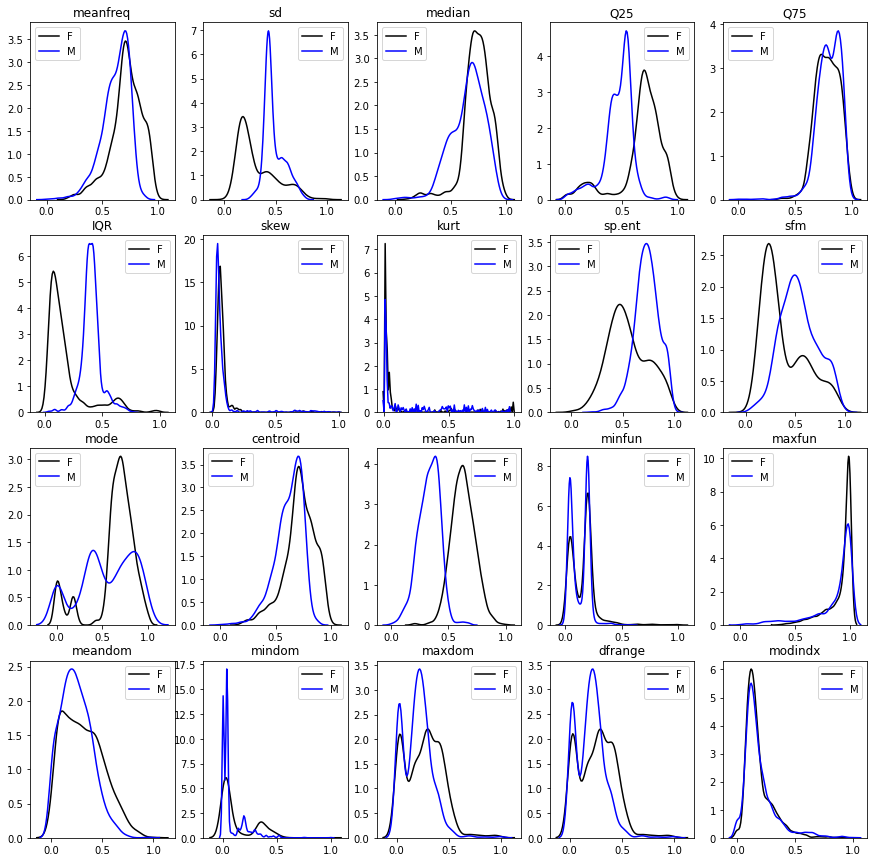

In [18]:
#Checking relationships

import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])
    sns.kdeplot(df.loc[df['label'] == 0, df.columns[i-1]], color= 'black', label='F')
    sns.kdeplot(df.loc[df['label'] == 1, df.columns[i-1]], color= 'blue', label='M')

In [27]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import neural_network
from sklearn.metrics import classification_report

In [28]:
train, test = train_test_split(df, test_size=0.2)

In [29]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1979,0.816755,0.182218,0.817439,0.782789,0.818761,0.098716,0.058241,0.004729,0.587199,0.229084,0.816233,0.816755,0.743537,0.124892,0.981526,0.447517,0.006452,0.295568,0.295780,0.261797,0.0
1571,0.562774,0.421494,0.504727,0.442508,0.748440,0.384322,0.080971,0.010133,0.745460,0.515023,0.395116,0.562774,0.296347,0.184692,0.766967,0.249143,0.000000,0.182586,0.182851,0.285997,1.0
2406,0.890167,0.172182,0.888547,0.863122,0.888915,0.083233,0.058608,0.004263,0.422880,0.203132,0.845912,0.890167,0.657814,0.193554,0.972570,0.221848,0.040860,0.193710,0.193133,0.069839,0.0
1001,0.781923,0.418838,0.833182,0.647945,0.913657,0.330965,0.032438,0.001493,0.713405,0.356645,0.900621,0.781923,0.342391,0.191170,0.963717,0.411808,0.040860,0.501430,0.501073,0.078482,1.0
1047,0.778336,0.403627,0.863094,0.642931,0.901453,0.324343,0.050406,0.003610,0.684168,0.377364,0.894150,0.778336,0.399151,0.195740,0.999749,0.240766,0.040860,0.195854,0.195279,0.152161,1.0


In [30]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [31]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [32]:
def classify(model,x_train,y_train,x_test,y_test):
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [35]:
import numpy as np
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at Hidden Layer =%s." % (error_rate[kloc], hidden_layer[kloc]))
    return hidden_layer[kloc]

In [36]:
h=nn_error(20,x_train,y_train,x_test,y_test)

Lowest error is 0.026813880126182965 occurs at Hidden Layer =2.


In [37]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9698    0.9787    0.9742       328
        male     0.9769    0.9673    0.9721       306

    accuracy                         0.9732       634
   macro avg     0.9733    0.9730    0.9731       634
weighted avg     0.9732    0.9732    0.9732       634



In [38]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

Lowest error is 0.031545741324921134 occurs at Hidden Layer =1.


In [39]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9667    0.9726    0.9696       328
        male     0.9704    0.9641    0.9672       306

    accuracy                         0.9685       634
   macro avg     0.9685    0.9683    0.9684       634
weighted avg     0.9685    0.9685    0.9685       634

